In [33]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Optional

In [9]:
# define the state structure
class BatsmanState(TypedDict):
    name: Optional[str]
    runs: int
    balls_faced: int
    fours: int
    sixes: int

    strike_rate: float
    bpb: float  # balls per boundary 
    boundary_percent: float
    summary: Optional[str]

In [24]:
def calculate_sr(state: BatsmanState):
    strike_rate = (state['runs'] / state['balls_faced']) * 100 if state['balls_faced'] > 0 else 0
    return {'strike_rate': strike_rate}

In [25]:
# calculate balls per boundary
def calculate_bpb(state: BatsmanState):
    total_boundaries = state["fours"] + state["sixes"]
    bpb = (state["balls_faced"] / total_boundaries) if total_boundaries > 0 else float('inf')
    return {'bpb': bpb}

In [26]:
# calcualte boundary percentage
def calculate_boundary_percent(state: BatsmanState):
    total_boundaries = state["fours"] + state["sixes"]
    boundary_percent = (total_boundaries / state["balls_faced"]) * 100 if state["balls_faced"] > 0 else 0
    return {'boundary_percent': boundary_percent}

In [ ]:
# calculate final output
def final_output(state: BatsmanState):
    summary = f"name: {state.get('name', 'Unknown')}, runs: {state['runs']}, balls faced: {state['balls_faced']}, strike rate: {state['strike_rate']:.2f}, bpb: {state['bpb']:.2f}, boundary %: {state['boundary_percent']:.2f}"
    
    return {'summary': summary}

In [29]:
# define graph
graph = StateGraph(BatsmanState)

# adding nodes
graph.add_node("calculate_sr", calculate_sr)
graph.add_node("calculate_bpb", calculate_bpb)
graph.add_node("calculate_boundary_percent", calculate_boundary_percent)
graph.add_node("final_output", final_output)

# defining edges for parallel processing
graph.add_edge(START, "calculate_sr")
graph.add_edge(START, "calculate_bpb")
graph.add_edge(START, "calculate_boundary_percent")

graph.add_edge("calculate_sr", "final_output")
graph.add_edge("calculate_bpb", "final_output")
graph.add_edge("calculate_boundary_percent", "final_output")

graph.add_edge("final_output", END)

# compile the graph
workflow = graph.compile()

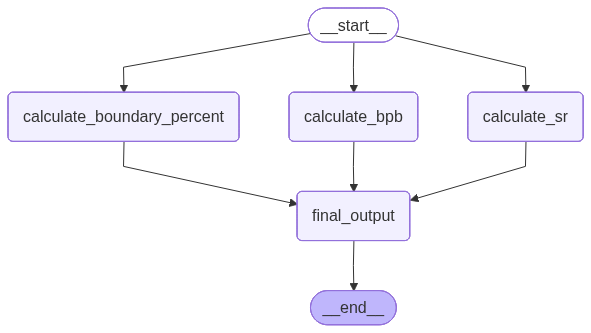

In [30]:
workflow

In [32]:
# creating initial state
initial_state: BatsmanState = {
    "name": "John Doe",
    "runs": 120,
    "balls_faced": 100,
    "fours": 15,
    "sixes": 5,
    "strike_rate": 0.0,
    "bpb": 0.0,
    "boundary_percent": 0.0,
    "summary": None
}
workflow.invoke(initial_state)

{'name': 'John Doe',
 'runs': 120,
 'balls_faced': 100,
 'fours': 15,
 'sixes': 5,
 'strike_rate': 120.0,
 'bpb': 5.0,
 'boundary_percent': 20.0,
 'summary': 'name: John Doe, runs: 120, balls faced: 100, strike rate: 120.00, bpb: 5.00, boundary %: 20.00'}